In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, boxcox

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Geopandas
import geopandas as gpd



In [2]:
encuesta = pd.read_csv(r'C:\Users\Notebook Asus\Documents\Ciencia de datos\encuesta-anual-hogares-2019.csv',delimiter=',',encoding="ISO-8859-1")

In [3]:
encuesta

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14314,5794,1,1,10,Resto de la Ciudad,99,Varon,Jefe,Casado/a,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,5,Pais no limitrofe,Solo obra social,NaN,No corresponde
14315,5794,1,2,10,Resto de la Ciudad,78,Mujer,Otro familiar,Soltero/a,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),9,Partido GBA,Solo obra social,No,No corresponde
14316,5794,1,3,10,Resto de la Ciudad,60,Mujer,Hijo/a - Hijastro/a,Separado/a de unión o matrimonio,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Solo obra social,Si,2
14317,5794,1,4,10,Resto de la Ciudad,92,Mujer,Conyugue o pareja,Casado/a,No corresponde,...,14250,No asiste pero asistió,No corresponde,No corresponde,Primario comun,7,CABA,Solo obra social,Si,1


In [4]:
# Vemos que datos tiene el dataset

encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14319 non-null  int64 
 1   nhogar                       14319 non-null  int64 
 2   miembro                      14319 non-null  int64 
 3   comuna                       14319 non-null  int64 
 4   dominio                      14319 non-null  object
 5   edad                         14319 non-null  int64 
 6   sexo                         14319 non-null  object
 7   parentesco_jefe              14319 non-null  object
 8   situacion_conyugal           14318 non-null  object
 9   num_miembro_padre            14319 non-null  object
 10  num_miembro_madre            14319 non-null  object
 11  estado_ocupacional           14319 non-null  object
 12  cat_ocupacional              14319 non-null  object
 13  calidad_ingresos_lab         14

In [5]:
# Revisamos valores nulos 

encuesta.isnull().any()

id                             False
nhogar                         False
miembro                        False
comuna                         False
dominio                        False
edad                           False
sexo                           False
parentesco_jefe                False
situacion_conyugal              True
num_miembro_padre              False
num_miembro_madre              False
estado_ocupacional             False
cat_ocupacional                False
calidad_ingresos_lab           False
ingreso_total_lab              False
calidad_ingresos_no_lab        False
ingreso_total_no_lab           False
calidad_ingresos_totales       False
ingresos_totales               False
calidad_ingresos_familiares    False
ingresos_familiares            False
ingreso_per_capita_familiar    False
estado_educativo               False
sector_educativo                True
nivel_actual                   False
nivel_max_educativo             True
años_escolaridad                True
l

In [6]:
# ACA EMPEZAMOS A SACAR INFORMACION QUE NO NOS SIRVE

encuesta.drop(columns=['num_miembro_padre','num_miembro_madre','calidad_ingresos_no_lab','ingreso_total_no_lab','calidad_ingresos_totales','ingresos_totales','calidad_ingresos_familiares','ingresos_familiares','ingreso_per_capita_familiar','nivel_max_educativo','hijos_nacidos_vivos','calidad_ingresos_lab','sector_educativo'],inplace=True)

In [7]:
# Como queda el dataset

encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        14319 non-null  int64 
 1   nhogar                    14319 non-null  int64 
 2   miembro                   14319 non-null  int64 
 3   comuna                    14319 non-null  int64 
 4   dominio                   14319 non-null  object
 5   edad                      14319 non-null  int64 
 6   sexo                      14319 non-null  object
 7   parentesco_jefe           14319 non-null  object
 8   situacion_conyugal        14318 non-null  object
 9   estado_ocupacional        14319 non-null  object
 10  cat_ocupacional           14319 non-null  object
 11  ingreso_total_lab         14319 non-null  int64 
 12  estado_educativo          14319 non-null  object
 13  nivel_actual              14319 non-null  object
 14  años_escolaridad      

In [8]:
np.unique(encuesta.dominio)

array(['Resto de la Ciudad', 'Villas de emergencia'], dtype=object)

In [9]:
# Empezamos a ver como se compone cada feature

In [10]:
encuesta['parentesco_jefe'] = encuesta['parentesco_jefe'].apply(str)
np.unique(encuesta.parentesco_jefe)

array(['Conyugue o pareja', 'Hijo/a - Hijastro/a', 'Jefe', 'Nieto/a',
       'Otro familiar', 'Otro no familiar', 'Padre/Madre/Suegro/a',
       'Servicio domestico y sus familiares', 'Yerno/nuera'], dtype=object)

In [11]:
# Cambiamos estructura

mask = encuesta.parentesco_jefe == 'Jefe'
encuesta.parentesco_jefe.where(mask, 'No Jefe',inplace=True)


In [12]:
np.unique(encuesta.parentesco_jefe)

array(['Jefe', 'No Jefe'], dtype=object)

In [13]:
encuesta['situacion_conyugal'] = encuesta['situacion_conyugal'].apply(str)
np.unique(encuesta.situacion_conyugal)

array(['Casado/a', 'Divorciado/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Soltero/a', 'Unido/a',
       'Viudo/a', 'nan'], dtype=object)

In [14]:
encuesta.situacion_conyugal.value_counts()

Soltero/a                           3542
Casado/a                            3511
Unido/a                             2467
No corresponde                      2375
Separado/a de unión o matrimonio    1110
Viudo/a                              797
Divorciado/a                         516
nan                                    1
Name: situacion_conyugal, dtype: int64

In [15]:
# Cambiamos estructura

mask = encuesta.situacion_conyugal != 'Separado/a de unión o matrimonio'
mask2 = encuesta.situacion_conyugal != 'No corresponde'
mask3 = encuesta.situacion_conyugal != 'nan'
encuesta.situacion_conyugal.where(mask, 'Soltero/a',inplace=True)
encuesta.situacion_conyugal.where(mask2, 'Soltero/a',inplace=True)
encuesta.situacion_conyugal.where(mask3, 'Soltero/a',inplace=True)

In [16]:
np.unique(encuesta.situacion_conyugal)

array(['Casado/a', 'Divorciado/a', 'Soltero/a', 'Unido/a', 'Viudo/a'],
      dtype=object)

In [17]:
encuesta.situacion_conyugal.value_counts()

Soltero/a       7028
Casado/a        3511
Unido/a         2467
Viudo/a          797
Divorciado/a     516
Name: situacion_conyugal, dtype: int64

In [18]:
encuesta['estado_ocupacional'] = encuesta['estado_ocupacional'].apply(str)
np.unique(encuesta.estado_ocupacional)  

array(['Desocupado', 'Inactivo', 'Ocupado'], dtype=object)

In [19]:
encuesta['nivel_actual'] = encuesta['nivel_actual'].apply(str)
np.unique(encuesta.nivel_actual)

array(['Jardin maternal', 'No corresponde', 'Otras escuelas especiales',
       'Postgrado', 'Primario adultos', 'Primario comun',
       'Primario especial', 'Sala de 3', 'Sala de 4', 'Sala de 5',
       'Secundario/medio adultos', 'Secundario/medio comun',
       'Terciario/superior no universitario', 'Universitario'],
      dtype=object)

In [20]:
encuesta.nivel_actual.value_counts()

No corresponde                         9903
Primario comun                         1227
Universitario                          1042
Secundario/medio comun                  910
Terciario/superior no universitario     262
Postgrado                               180
Sala de 4                               173
Sala de 5                               162
Jardin maternal                         161
Sala de 3                               147
Secundario/medio adultos                105
Otras escuelas especiales                23
Primario especial                        15
Primario adultos                          9
Name: nivel_actual, dtype: int64

In [21]:
#Miramos dentro del nivel actual como se distribuye el ingreso en funcion del mismo

encuesta_nivel_actual = pd.pivot_table(encuesta,index=["nivel_actual"],values=["ingreso_total_lab"],aggfunc=("sum","count",np.mean))
encuesta_nivel_actual

ingreso_total_lab                \
                                                count          mean   
nivel_actual                                                          
Jardin maternal                                 161.0      0.000000   
No corresponde                                 9903.0  25649.758861   
Otras escuelas especiales                        23.0      0.000000   
Postgrado                                       180.0  54920.000000   
Primario adultos                                  9.0   3800.000000   
Primario comun                                 1227.0      0.162999   
Primario especial                                15.0      0.000000   
Sala de 3                                       147.0      0.000000   
Sala de 4                                       173.0      0.000000   
Sala de 5                                       162.0      0.000000   
Secundario/medio adultos                        105.0  10655.714286   
Secundario/medio comun                          910.0    196.153846   
Terciario/superior no universitario             262.0  18552.595420   
Universitario                                  1042.0  16716.084453   

                                                  
                                             sum  
nivel_actual                                      
Jardin maternal                              0.0  
No corresponde                       254009562.0  
Otras escuelas especiales                    0.0  
Postgrado                              9885600.0  
Primario adultos                         34200.0  
Primario comun                             200.0  
Primario especial                            0.0  
Sala de 3                                    0.0  
Sala de 4                                    0.0  
Sala de 5                                    0.0  
Secundario/medio adultos               1118850.0  
Secundario/medio comun                  178500.0  
Terciario/superior no universitario    4860780.0  
Universitario                         17418160.0

In [22]:
#Asumimos que la categoria "No corresponde" son personas recibidas y las categorizamos en orden

mask0 = (encuesta.nivel_actual != 'Jardin maternal') & (encuesta.nivel_actual != 'Sala de 3') & (encuesta.nivel_actual != 'Sala de 4') & (encuesta.nivel_actual != 'Sala de 5')
mask1 = (encuesta.nivel_actual != 'Primario adultos') & (encuesta.nivel_actual != 'Primario comun') & (encuesta.nivel_actual != 'Primario especial')
mask2 = (encuesta.nivel_actual != 'Otras escuelas especiales') & (encuesta.nivel_actual != 'Secundario/medio adultos') & (encuesta.nivel_actual != 'Secundario/medio comun')
mask3 = (encuesta.nivel_actual != 'No corresponde')
encuesta.nivel_actual.where(mask0, 'Jardin',inplace=True)
encuesta.nivel_actual.where(mask1, 'Primario',inplace=True)
encuesta.nivel_actual.where(mask2, 'Secundario',inplace=True)
encuesta.nivel_actual.where(mask3, 'Recibido universitario',inplace=True)


In [23]:
np.unique(encuesta.nivel_actual)

array(['Jardin', 'Postgrado', 'Primario', 'Recibido universitario',
       'Secundario', 'Terciario/superior no universitario',
       'Universitario'], dtype=object)

In [24]:
encuesta.nivel_actual.value_counts()

Recibido universitario                 9903
Primario                               1251
Universitario                          1042
Secundario                             1038
Jardin                                  643
Terciario/superior no universitario     262
Postgrado                               180
Name: nivel_actual, dtype: int64

In [25]:
encuesta['años_escolaridad'] = encuesta['años_escolaridad'].apply(str)
np.unique(encuesta.años_escolaridad)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '3', '4', '5', '6', '7', '8', '9',
       'Ningun año de escolaridad aprobado', 'nan'], dtype=object)

In [26]:
encuesta.años_escolaridad.value_counts()

12                                    2824
17                                    1851
15                                    1498
7                                     1263
Ningun año de escolaridad aprobado    1226
14                                     722
9                                      588
19                                     557
10                                     539
13                                     483
11                                     451
8                                      397
16                                     334
3                                      261
2                                      241
6                                      229
5                                      224
4                                      211
1                                      196
18                                     162
nan                                     62
Name: años_escolaridad, dtype: int64

In [27]:
#Cambiamos estructura 

mask0 = (encuesta.años_escolaridad != 'nan') & (encuesta.años_escolaridad != 'Ningun año de escolaridad aprobado')
encuesta.años_escolaridad.where(mask0, 0, inplace=True)

In [28]:
encuesta.años_escolaridad.value_counts()

12    2824
17    1851
15    1498
0     1288
7     1263
14     722
9      588
19     557
10     539
13     483
11     451
8      397
16     334
3      261
2      241
6      229
5      224
4      211
1      196
18     162
Name: años_escolaridad, dtype: int64

In [29]:
encuesta['lugar_nacimiento'] = encuesta['lugar_nacimiento'].apply(str)
np.unique(encuesta.lugar_nacimiento)

array(['CABA', 'Otra provincia', 'PBA excepto GBA', 'PBA sin especificar',
       'Pais limitrofe', 'Pais no limitrofe', 'Partido GBA', 'nan'],
      dtype=object)

In [30]:
encuesta.lugar_nacimiento.value_counts()

CABA                   8750
Otra provincia         1615
Pais limitrofe         1206
Partido GBA            1147
Pais no limitrofe      1030
PBA excepto GBA         565
PBA sin especificar       5
nan                       1
Name: lugar_nacimiento, dtype: int64

In [31]:
#Cambiamos estructura 

mask0 = (encuesta.lugar_nacimiento != 'nan') & (encuesta.lugar_nacimiento != 'PBA excepto GBA') & (encuesta.lugar_nacimiento != 'PBA sin especificar') 
mask1 = (encuesta.lugar_nacimiento != 'Pais limitrofe') & (encuesta.lugar_nacimiento != 'Pais no limitrofe') 
encuesta.lugar_nacimiento.where(mask0, 'PBA', inplace=True)
encuesta.lugar_nacimiento.where(mask1, 'Otro pais', inplace=True)



In [32]:
encuesta['lugar_nacimiento'] = encuesta['lugar_nacimiento'].apply(str)
np.unique(encuesta.lugar_nacimiento)

array(['CABA', 'Otra provincia', 'Otro pais', 'PBA', 'Partido GBA'],
      dtype=object)

In [33]:
#Cambiamos estructura 

mask0 = (encuesta.afiliacion_salud != 'nan')
encuesta.afiliacion_salud.where(mask0, 'Solo sistema publico', inplace=True)

In [34]:
encuesta['afiliacion_salud'] = encuesta['afiliacion_salud'].apply(str)
np.unique(encuesta.afiliacion_salud)

array(['Otros', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Solo sistema publico', 'nan'],
      dtype=object)

In [35]:
np.unique(encuesta.cantidad_hijos_nac_vivos)

array(['1', '10', '11', '12', '15', '2', '3', '4', '5', '6', '7', '8',
       '9', 'No corresponde'], dtype=object)

In [36]:
encuesta.cantidad_hijos_nac_vivos.value_counts()

No corresponde    10286
2                  1633
1                  1168
3                   765
4                   269
5                    94
6                    48
7                    31
8                     8
9                     6
11                    5
10                    3
12                    2
15                    1
Name: cantidad_hijos_nac_vivos, dtype: int64

In [37]:
#Cambiamos estructura 

mask0 = (encuesta.cantidad_hijos_nac_vivos != 'No corresponde')
encuesta.cantidad_hijos_nac_vivos.where(mask0, 0, inplace=True)

In [38]:
encuesta.cantidad_hijos_nac_vivos.value_counts()

0     10286
2      1633
1      1168
3       765
4       269
5        94
6        48
7        31
8         8
9         6
11        5
10        3
12        2
15        1
Name: cantidad_hijos_nac_vivos, dtype: int64

# Empezamos con los modelos de regresion

In [39]:
#Seleccionamos solo a las personas entre 18 a 65 años con ingreso laboral mayor a 0

enc_18a65 = encuesta.loc[(encuesta['edad']>=18)&(encuesta['edad']<=65)&(encuesta['ingreso_total_lab']>0)]
np.shape(enc_18a65)

(6824, 18)

In [56]:
enc_18a65_pos = enc_18a65.loc[enc_18a65["ingreso_total_lab"] > 0]
enc_18a65_pos

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,estado_ocupacional,cat_ocupacional,ingreso_total_lab,estado_educativo,nivel_actual,años_escolaridad,lugar_nacimiento,afiliacion_salud,cantidad_hijos_nac_vivos
3,2,1,2,2,Resto de la Ciudad,50,Mujer,No Jefe,Viudo/a,Ocupado,Asalariado,70000,No asiste pero asistió,Recibido universitario,17,CABA,Solo prepaga o mutual via OS,2
6,3,1,2,10,Resto de la Ciudad,21,Varon,No Jefe,Unido/a,Ocupado,Asalariado,44000,No asiste pero asistió,Recibido universitario,12,CABA,Solo obra social,0
10,5,1,1,8,Resto de la Ciudad,19,Mujer,Jefe,Soltero/a,Ocupado,Asalariado,28000,Asiste,Terciario/superior no universitario,13,Otra provincia,Solo obra social,0
11,5,2,1,8,Resto de la Ciudad,23,Mujer,Jefe,Soltero/a,Ocupado,Asalariado,25000,Asiste,Terciario/superior no universitario,13,Otra provincia,Solo obra social,0
24,14,1,1,6,Resto de la Ciudad,19,Varon,Jefe,Soltero/a,Ocupado,Asalariado,22000,No asiste pero asistió,Recibido universitario,11,Partido GBA,Solo obra social,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14285,5776,1,2,13,Resto de la Ciudad,52,Varon,No Jefe,Soltero/a,Ocupado,Asalariado,30000,Asiste,Universitario,12,Partido GBA,Solo obra social,0
14288,5778,1,2,6,Resto de la Ciudad,54,Mujer,No Jefe,Viudo/a,Ocupado,Asalariado,24000,No asiste pero asistió,Recibido universitario,10,Partido GBA,Solo obra social,2
14293,5781,1,3,7,Resto de la Ciudad,31,Mujer,No Jefe,Soltero/a,Ocupado,Asalariado,28000,No asiste pero asistió,Recibido universitario,14,CABA,Solo obra social,2
14308,5790,1,2,13,Resto de la Ciudad,37,Mujer,No Jefe,Soltero/a,Ocupado,Asalariado,38000,No asiste pero asistió,Recibido universitario,12,Otra provincia,Solo obra social,1


In [58]:
enc_18a65_pos['ingreso_total_lab'] = np.log10(enc_18a65_pos["ingreso_total_lab"])
enc_18a65_pos.ingreso_total_lab.describe()

count    6824.000000
mean        4.435173
std         0.404873
min         2.000000
25%         4.255273
50%         4.477121
75%         4.698970
max         6.000000
Name: ingreso_total_lab, dtype: float64

In [60]:
#Aplicamos LabelEncoder a las variables categoricas 

cols = ('dominio','parentesco_jefe','estado_ocupacional','nivel_actual','afiliacion_salud','cat_ocupacional','estado_educativo')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(enc_18a65_pos[c].values)) 
    enc_18a65_pos[c] = lbl.transform(list(enc_18a65_pos[c].values))

In [61]:
enc_18a65_pos = pd.get_dummies(enc_18a65_pos,columns=['sexo','situacion_conyugal','lugar_nacimiento'])

In [62]:
enc_18a65_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6824 entries, 3 to 14313
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               6824 non-null   int64  
 1   nhogar                           6824 non-null   int64  
 2   miembro                          6824 non-null   int64  
 3   comuna                           6824 non-null   int64  
 4   dominio                          6824 non-null   int64  
 5   edad                             6824 non-null   int64  
 6   parentesco_jefe                  6824 non-null   int64  
 7   estado_ocupacional               6824 non-null   int64  
 8   cat_ocupacional                  6824 non-null   int64  
 9   ingreso_total_lab                6824 non-null   float64
 10  estado_educativo                 6824 non-null   int64  
 11  nivel_actual                     6824 non-null   int64  
 12  años_escolaridad   

In [63]:
enc_18a65_pos = enc_18a65_pos.reset_index()

In [64]:
enc_18a65_pos.head()


,index,id,nhogar,miembro,comuna,dominio,edad,parentesco_jefe,estado_ocupacional,cat_ocupacional,...,situacion_conyugal_Casado/a,situacion_conyugal_Divorciado/a,situacion_conyugal_Soltero/a,situacion_conyugal_Unido/a,situacion_conyugal_Viudo/a,lugar_nacimiento_CABA,lugar_nacimiento_Otra provincia,lugar_nacimiento_Otro pais,lugar_nacimiento_PBA,lugar_nacimiento_Partido GBA
0,3,2,1,2,2,0,50,1,2,0,...,0,0,0,0,1,1,0,0,0,0
1,6,3,1,2,10,0,21,1,2,0,...,0,0,0,1,0,1,0,0,0,0
2,10,5,1,1,8,0,19,0,2,0,...,0,0,1,0,0,0,1,0,0,0
3,11,5,2,1,8,0,23,0,2,0,...,0,0,1,0,0,0,1,0,0,0
4,24,14,1,1,6,0,19,0,2,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
enc_18a65_pos = enc_18a65_pos.drop(columns=['sexo_Varon','lugar_nacimiento_Otro pais','situacion_conyugal_Viudo/a'])

In [66]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [67]:
clean_dataset(enc_18a65_pos)

,index,id,nhogar,miembro,comuna,dominio,edad,parentesco_jefe,estado_ocupacional,cat_ocupacional,...,cantidad_hijos_nac_vivos,sexo_Mujer,situacion_conyugal_Casado/a,situacion_conyugal_Divorciado/a,situacion_conyugal_Soltero/a,situacion_conyugal_Unido/a,lugar_nacimiento_CABA,lugar_nacimiento_Otra provincia,lugar_nacimiento_PBA,lugar_nacimiento_Partido GBA
0,3.0,2.0,1.0,2.0,2.0,0.0,50.0,1.0,2.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6.0,3.0,1.0,2.0,10.0,0.0,21.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,10.0,5.0,1.0,1.0,8.0,0.0,19.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,11.0,5.0,2.0,1.0,8.0,0.0,23.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24.0,14.0,1.0,1.0,6.0,0.0,19.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,14285.0,5776.0,1.0,2.0,13.0,0.0,52.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6820,14288.0,5778.0,1.0,2.0,6.0,0.0,54.0,1.0,2.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6821,14293.0,5781.0,1.0,3.0,7.0,0.0,31.0,1.0,2.0,0.0,...,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6822,14308.0,5790.0,1.0,2.0,13.0,0.0,37.0,1.0,2.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [68]:
# Separamos los features del target

x = enc_18a65_pos.drop(columns=['ingreso_total_lab'])
y = enc_18a65_pos['ingreso_total_lab']

print("Los features seran:","\n",x,"\n")
print("El target sera:","\n", y,"\n")

Los features seran: 
       index    id  nhogar  miembro  comuna  dominio  edad  parentesco_jefe  \
0         3     2       1        2       2        0    50                1   
1         6     3       1        2      10        0    21                1   
2        10     5       1        1       8        0    19                0   
3        11     5       2        1       8        0    23                0   
4        24    14       1        1       6        0    19                0   
...     ...   ...     ...      ...     ...      ...   ...              ...   
6819  14285  5776       1        2      13        0    52                1   
6820  14288  5778       1        2       6        0    54                1   
6821  14293  5781       1        3       7        0    31                1   
6822  14308  5790       1        2      13        0    37                1   
6823  14313  5793       1        2       6        0    52                1   

      estado_ocupacional  cat_ocupacional

In [69]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.45, random_state=1)

In [70]:
# Definimos el escalador 
scaler = StandardScaler()
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [71]:
# Transformamos los x_train
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [72]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])
results_df

,Model,Features,R2,MSE,MAE


# Regresion Lineal

In [73]:
#Definimos el estimador
est = LinearRegression()

#Definimos diccionario con hyperparametros
parameters = {
                'fit_intercept' : [False, True]
            }

#Definimos la cantidad de folds para validar
n_folds = 5

#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [74]:
#Entrenamos
gs.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [75]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression() 

{'fit_intercept': True} 

-0.09388322707727477 



In [76]:
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

In [77]:
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mae:.6f}')
print(f'MSE: {linear_mse:.6f}')

R2 score: 0.427065
MAE: 0.224683
MSE: 0.098116


In [78]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear with log10',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae
                                   },ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427065,0.098116,0.224683


# Regresion Ridge

In [79]:
est = Ridge()

# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.1,1,10,20,25,30]

# Juntamos el diccionario de parametros
parameters = {
                'alpha': lambdas
            }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs1 = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [80]:
# Entrenamos
gs1.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 20, 25, 30]},
             scoring='neg_mean_squared_error')

In [81]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs1.best_estimator_, "\n")
print(gs1.best_params_, "\n")
print(gs1.best_score_, "\n")

Ridge(alpha=10) 

{'alpha': 10} 

-0.09383478255004532 



In [82]:
#Predicciones + Metricas
ridge_prediction = gs1.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

In [83]:
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mae:.6f}')
print(f'MSE: {ridge_mse:.6f}')

R2 score: 0.427645
MAE: 0.224514
MSE: 0.098016


In [84]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge with log10',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427065,0.098116,0.224683
1,Ridge with log10,Lineal,0.427645,0.098016,0.224514


# Regresion Support Vector con kernel Gaussiano

In [117]:
est = SVR()

# Lista del parametro lambda (parametro 'alpha')
parameters = {
                'C' : [1,10,50,100],
                'epsilon' : [0.0001,0.0015,0.001, 0.01, 0.1,1],
                'gamma':[0.001, 0.01, 0.1,1, 10,100]
             }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs2 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [118]:
# Entrenamos
gs2.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   27.2s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed: 12.5min
[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed: 21.6min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=3,
             param_grid={'C': [1, 10, 50, 100],
                         'epsilon': [0.0001, 0.0015, 0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [119]:
print(gs2.best_estimator_, "\n")
print(gs2.best_params_, "\n")
print(gs2.best_score_, "\n")

SVR(C=100, gamma=0.001) 

{'C': 100, 'epsilon': 0.1, 'gamma': 0.001} 

-0.0903222695335081 



In [120]:
# Prediccion + Metricas
svr_prediction = gs2.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

In [121]:
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mae:.6f}')
print(f'MSE: {svr_mse:.6f}')

R2 score: 0.451087
MAE: 0.218707
MSE: 0.094002


In [122]:
results_df = results_df.append({'Model':'SVR with log10',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427065,0.098116,0.224683
1,Ridge with log10,Lineal,0.427645,0.098016,0.224514
2,KNN Reg with log10,Linear,0.367188,0.108370,0.234143
3,Tree Dec with log10,Linear,0.401841,0.102435,0.230663
4,SVR with log10,Linear,0.451087,0.094002,0.218707


# Regresion por Arbol de Decision

In [111]:
est = DecisionTreeRegressor(random_state=0)

parameters = {
                'max_depth':[1,5,10,15],
                 'min_samples_split': [1,5,10,15],
                 'min_samples_leaf': [1,5,10,15,20,25,30,35,40],
                 'max_features': ['auto', 'sqrt', 'log2']
            }

# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs3 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [112]:
# Entrenamos
gs3.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 1658 tasks      | elapsed:    9.7s
[Parallel(n_jobs=3)]: Done 2160 out of 2160 | elapsed:   13.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=3,
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35, 40],
                         'min_samples_split': [1, 5, 10, 15]},
             scoring='neg_mean_squared_error', verbose=3)

In [113]:
print(gs3.best_estimator_, "\n")
print(gs3.best_params_, "\n")
print(gs3.best_score_, "\n")

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=35,
                      min_samples_split=5, random_state=0) 

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 35, 'min_samples_split': 5} 

-0.09298261778649033 



In [114]:
# Prediccion + Metricas
rtd_prediction = gs3.best_estimator_.predict(x_test_scaled)
rtd_r2 = r2_score(y_true=y_test, y_pred=rtd_prediction)
rtd_mse = mean_squared_error(y_true=y_test, y_pred=rtd_prediction)
rtd_mae = mean_absolute_error(y_true=y_test, y_pred=rtd_prediction)

In [115]:
print(f'R2 score: {rtd_r2:.6f}')
print(f'MAE: {rtd_mae:.6f}')
print(f'MSE: {rtd_mse:.6f}')

R2 score: 0.401841
MAE: 0.230663
MSE: 0.102435


In [116]:
results_df = results_df.append({'Model':'Tree Dec with log10',
                                'Features':'Linear',
                                'R2':rtd_r2,
                                'MSE':rtd_mse,
                                'MAE':rtd_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427065,0.098116,0.224683
1,Ridge with log10,Lineal,0.427645,0.098016,0.224514
2,KNN Reg with log10,Linear,0.367188,0.108370,0.234143
3,Tree Dec with log10,Linear,0.401841,0.102435,0.230663


In [ ]:
#results_df = results_df.drop(index=2)

In [110]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427065,0.098116,0.224683
1,Ridge with log10,Lineal,0.427645,0.098016,0.224514
2,KNN Reg with log10,Linear,0.367188,0.108370,0.234143


# KNN Regresion

In [103]:
est = KNeighborsRegressor()

parameters = {
                'n_neighbors':[1,10,30,50,70,100],
                'weights': ['uniform', 'distance']
            }
    
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs4 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [104]:
#Entrenamos 
gs4.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:   12.0s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid={'n_neighbors': [1, 10, 30, 50, 70, 100],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=3)

In [105]:
print(gs4.best_estimator_, "\n")
print(gs4.best_params_, "\n")
print(gs4.best_score_, "\n")

KNeighborsRegressor(n_neighbors=30, weights='distance') 

{'n_neighbors': 30, 'weights': 'distance'} 

-0.10397760438225374 



In [106]:
# Prediccion + Metricas
knn_prediction = gs4.best_estimator_.predict(x_test_scaled)
knn_r2 = r2_score(y_true=y_test, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=y_test, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=y_test, y_pred=knn_prediction)

In [107]:
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mae:.6f}')
print(f'MSE: {knn_mse:.6f}')

R2 score: 0.367188
MAE: 0.234143
MSE: 0.108370


In [108]:
results_df = results_df.append({'Model':'KNN Reg with log10',
                                'Features':'Linear',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear with log10,Lineal,0.427065,0.098116,0.224683
1,Ridge with log10,Lineal,0.427645,0.098016,0.224514
2,KNN Reg with log10,Linear,0.367188,0.108370,0.234143
3,KNN Reg with log10,Linear,0.367188,0.108370,0.234143


C:\Users\Notebook Asus\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


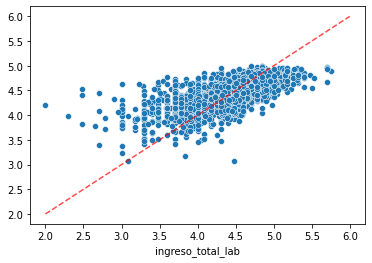

In [123]:
#Realizamos un grafico para mostrar como predice el modelo a lo largo de todos los valores

sns.scatterplot(y_test, svr_prediction)
plt.plot((2,6), (2,6), '--', color= 'r', alpha= 0.7, label= 'ideal')


In [124]:
base=10
exp=np.mean(svr_prediction-y_test)

El valor de la media de los residuos es:  1.081


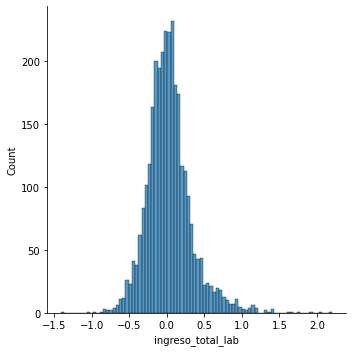

In [125]:
#Realizamos un displot para ver como se distribuyen las predicciones y los valores reales

sns.displot((svr_prediction-y_test))
print ("El valor de la media de los residuos es: ", np.round(pow(base,exp),3))